### Explore data

In [1]:
from tqdm import tqdm
import numpy as np

In [2]:
import os

##### ODE1

In [3]:
#cd ..

/home/kpgelvan/SymbolicMathematics


In [4]:
root = 'data/'

for filename in os.listdir(root):
    if 'ode1' not in filename:
        continue
    with open(root + filename) as file:
        train = [line.rstrip('\n') for line in file]

    tr_total, tr_unique, max_len = 0, 0, 0
    all_lens = []
    for line in tqdm(train):
        splitted = line.split('|')
        number, examples = splitted[0], splitted[1]
        examples = examples.split('\t')
        for el in examples:
            len_now = len(el.split(' '))
            if len_now > max_len:
                max_len = len_now
            all_lens.append(len_now)

        tr_total += int(number)
        tr_unique += 1


    print('Total examples generated in ' + filename, f'{tr_total:,}')
    print('Unique examples fed to model in ' + filename, f'{tr_unique:,}')
    print('Max len in ' + filename, max_len)
    print('Mean len in ' + filename, np.mean(all_lens))
    print('-' * 100)

  0%|          | 0/13797 [00:00<?, ?it/s]

Total examples generated in ode1.valid 11,508
Unique examples fed to model in ode1.valid 7,994
Max len in ode1.valid 510
Mean len in ode1.valid 80.38516387290468
----------------------------------------------------------------------------------------------------


100%|██████████| 7968/7968 [00:00<00:00, 137163.16it/s]


Total examples generated in ode1.no_dups_valtest 16,991
Unique examples fed to model in ode1.no_dups_valtest 13,797
Max len in ode1.no_dups_valtest 510
Mean len in ode1.no_dups_valtest 87.61208958469233
----------------------------------------------------------------------------------------------------
Total examples generated in ode1.test 11,745
Unique examples fed to model in ode1.test 7,968
Max len in ode1.test 510
Mean len in ode1.test 80.29925953815261
----------------------------------------------------------------------------------------------------


100%|██████████| 5157001/5157001 [00:26<00:00, 197739.48it/s]


Total examples generated in ode1.train_half 45,087,047
Unique examples fed to model in ode1.train_half 5,157,001
Max len in ode1.train_half 510
Mean len in ode1.train_half 48.096295986756644
----------------------------------------------------------------------------------------------------


100%|██████████| 65340431/65340431 [08:05<00:00, 134721.40it/s]


Total examples generated in ode1.train 105,270,477
Unique examples fed to model in ode1.train 65,340,431
Max len in ode1.train 510
Mean len in ode1.train 77.42633414064869
----------------------------------------------------------------------------------------------------


### Results and metrics

In [45]:
import seaborn as sns
sns.set()

In [46]:
names = {
        '277969':'pos emb',
        '277970':'seq rel att 32',
        #'277971':'seq rel att ?!',
        '281326':'seq rel att 32 FULL',
        '277972':'tree pos enc enconly 4 16',
        '277973':'tree rel att'
}

In [47]:
root = '../dumped/'
chosen_runs = names.keys()


runs = []
for root_next in os.listdir(root):
    for filename in os.listdir(root+root_next):
        run_name = root + root_next + '/' + filename + '/train.log'
        if any(x in run_name for x in chosen_runs):
            runs.append(run_name)

In [48]:
import datetime
import json

is_end=False

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            if len(time) == 1:     # day num
                line_split = line.split()
                day, time = line_split[5], line_split[7]
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = int(day) * 24 + (time.hour * 60 + time.minute) / 60
            else:
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = (time.hour * 60 + time.minute) / 60
            #if time > 70:
            #    is_end=True
            #    break 
            
            whole_dict['time'].append(time)
            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])
    runs_dict[name.split('/')[3]] = whole_dict

Количество эпох каждой модели:

In [49]:
for key_1 in runs_dict.keys():
    for key_2 in runs_dict[key_1].keys():
        print(key_1, '\t', len(runs_dict[key_1][key_2]), '\t', names[key_1])
        break

277969 	 200 	 pos emb
277970 	 200 	 seq rel att 32
281326 	 155 	 seq rel att 32 FULL
277973 	 148 	 tree rel att
277972 	 168 	 tree pos enc enconly 4 16


Если надо, то режем все по 275:

### USUAL

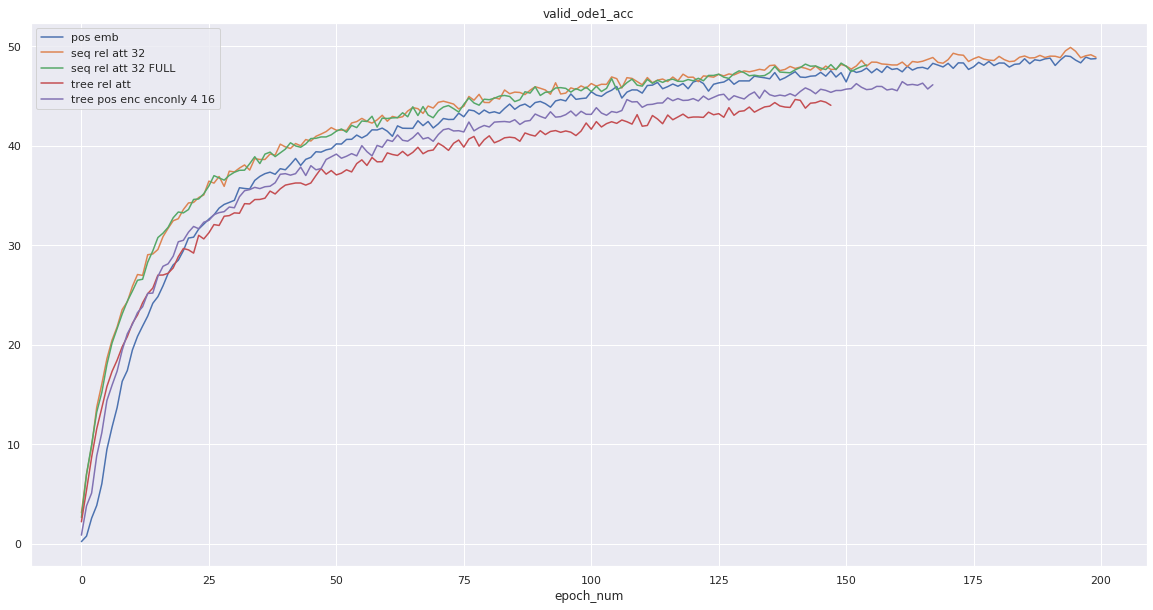

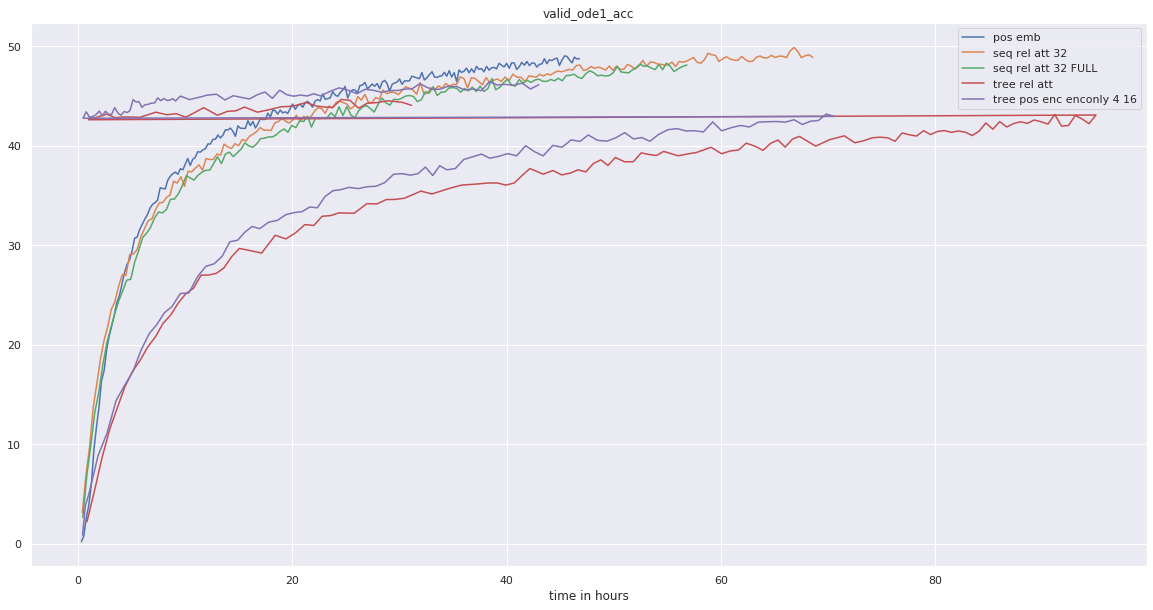

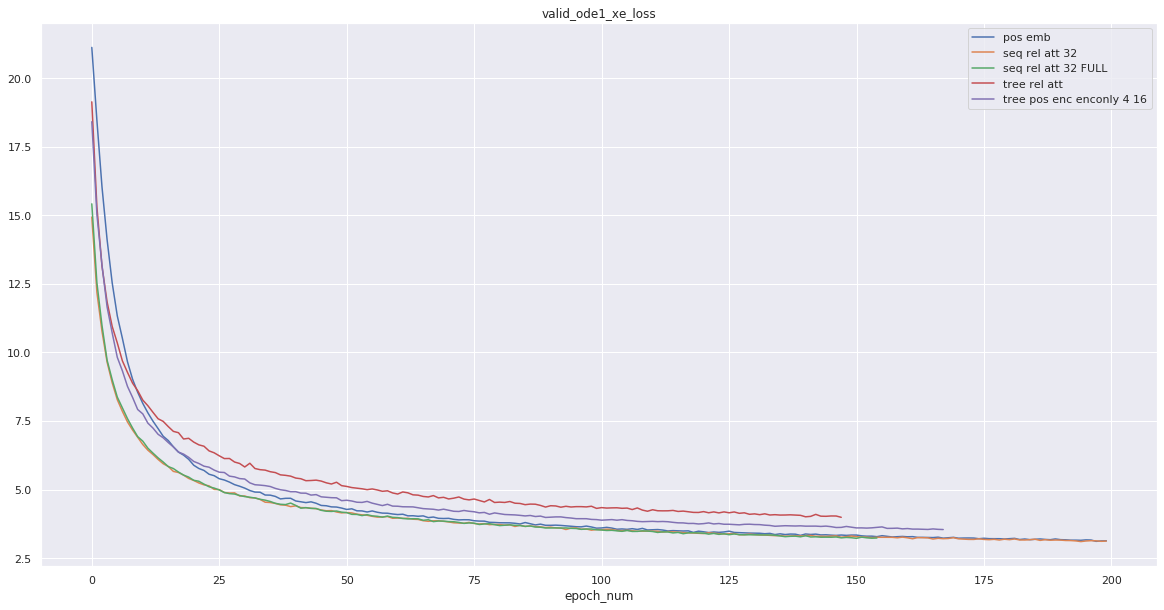

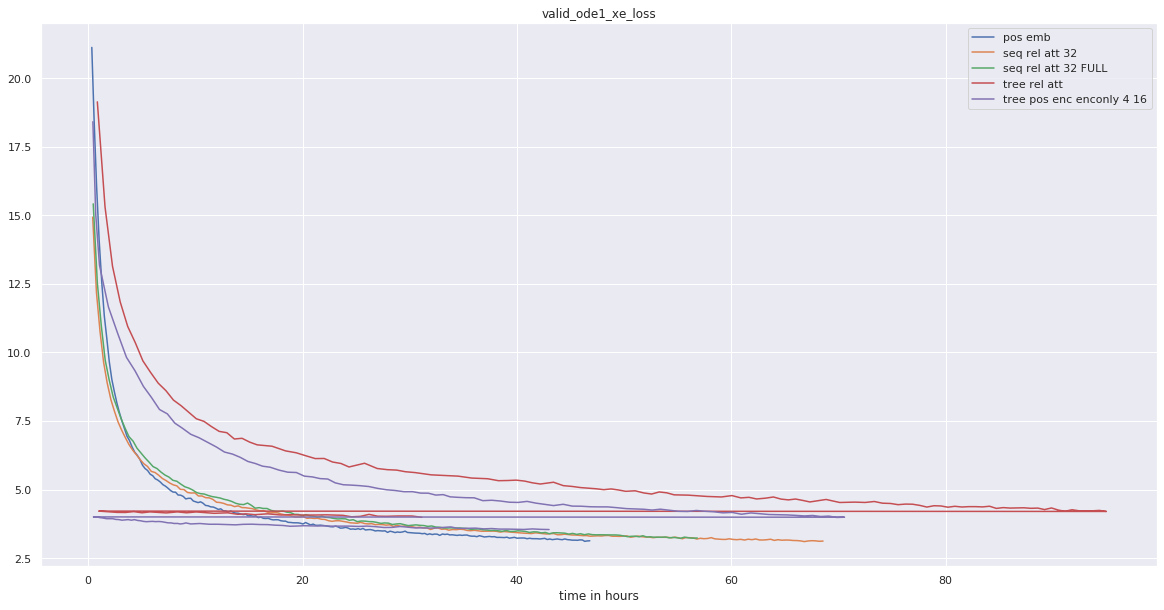

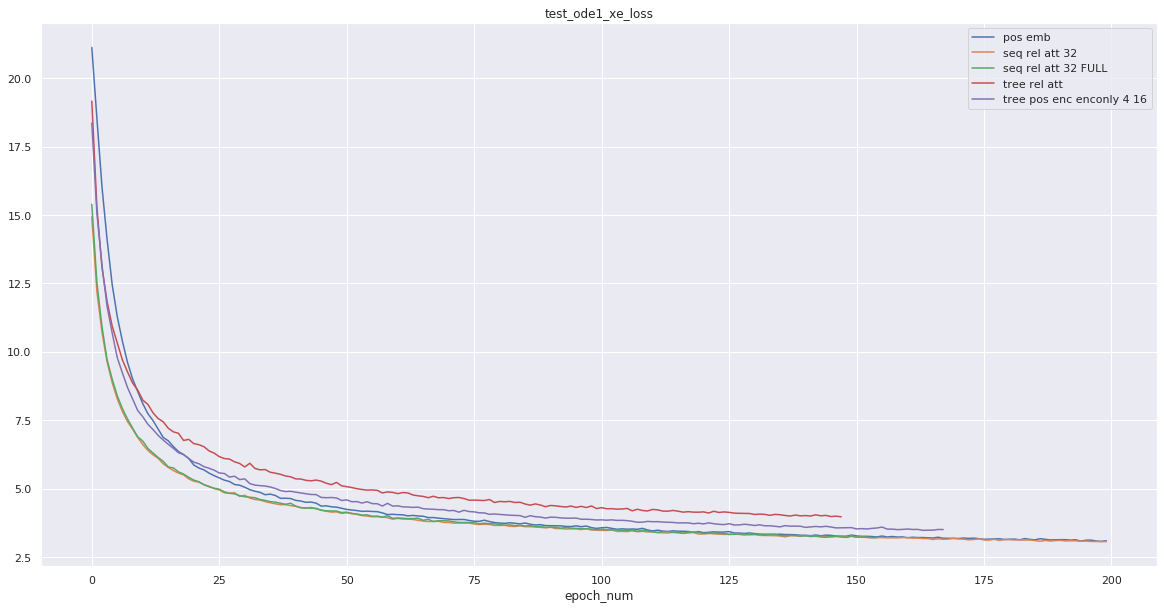

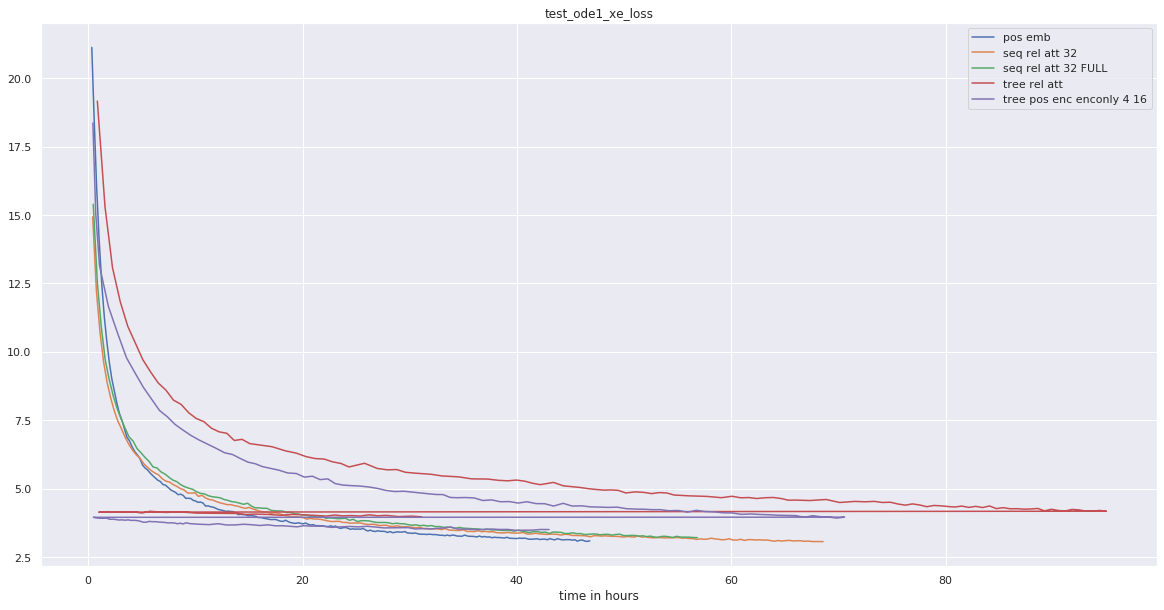

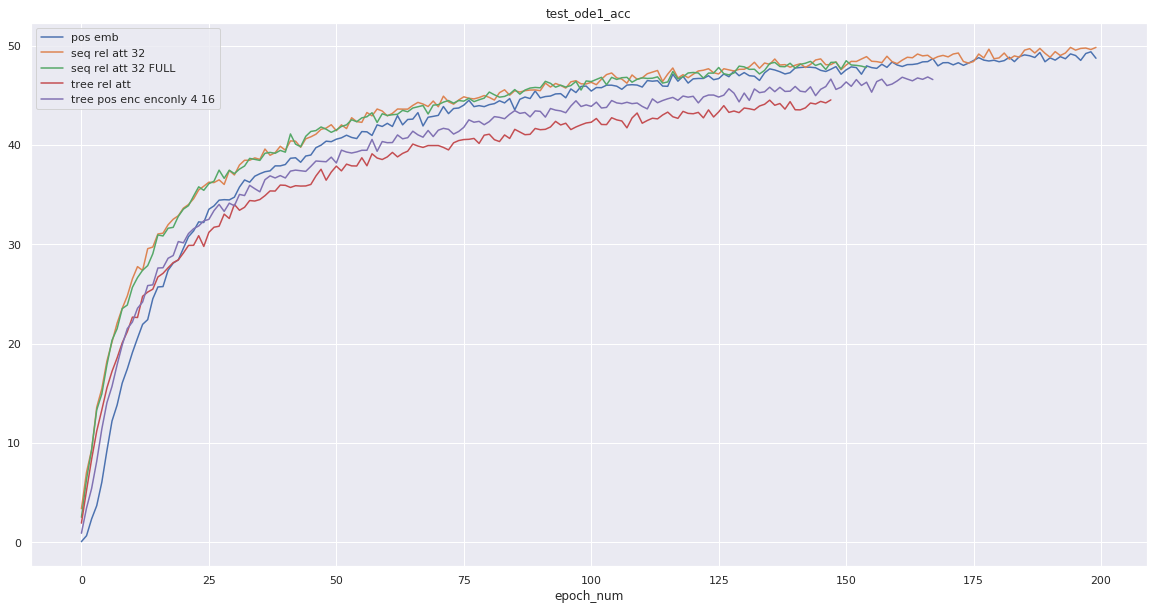

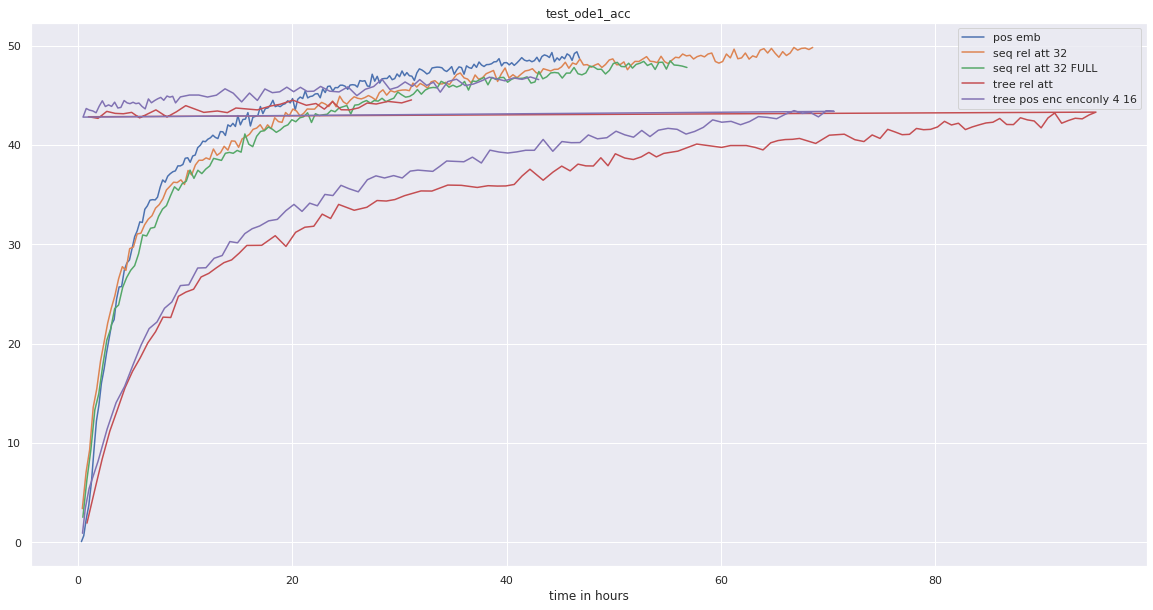

In [50]:
import matplotlib.pyplot as plt


needed = ['valid_ode1_acc', 'valid_ode1_xe_loss', 'test_ode1_xe_loss', 'test_ode1_acc']
for key in needed:
    plt.figure(figsize=(20,10))
    for run in runs_dict.keys():
        plt.plot(
            runs_dict[run]['epoch'],
            runs_dict[run][key], 
            label=names[run]
        )
        #plt.xlim(200, 300)
        #plt.ylim(70, 80)
        plt.xlabel('epoch_num')
        plt.title(key)
        plt.legend()
    
    plt.show()
    
    plt.figure(figsize=(20,10))
    for run in runs_dict.keys():
        plt.plot(
            runs_dict[run]['time'],
            runs_dict[run][key],
            label=names[run]
        )
        plt.xlabel('time in hours')
        plt.title(key)
        plt.legend()
            
    plt.show()

### working with beam search evaluation

In [17]:
names = {
        }

In [18]:
import os

root = '../dumped/'
chosen_runs = list(names.keys())


runs = []
for root_next in os.listdir(root):
    for filename in os.listdir(root+root_next):
        run_name = root + root_next + '/' + filename + '/train.log'
        if any(x in run_name for x in chosen_runs):
            runs.append(run_name)
            print(run_name)

../dumped/eval_seq_rel_att_nodups/271717/train.log
../dumped/eval_seq_rel_att_nodups/271716/train.log
../dumped/eval_seq_rel_att_nodups/261092/train.log
../dumped/eval_tree_pos_enc_nodups/271829/train.log
../dumped/eval_tree_pos_enc_nodups/271823/train.log
../dumped/eval_tree_pos_enc_nodups/271828/train.log
../dumped/eval_tree_pos_enc_nodups/271824/train.log
../dumped/eval_tree_pos_enc_nodups/271822/train.log
../dumped/eval_tree_pos_enc/271832/train.log
../dumped/eval_tree_pos_enc/271833/train.log
../dumped/eval_tree_pos_enc/271834/train.log
../dumped/eval_tree_pos_enc/271831/train.log
../dumped/eval_tree_pos_enc/271830/train.log
../dumped/eval_tree_rel_att/257866/train.log
../dumped/eval_tree_pos_enc_2004_nodups/273342/train.log
../dumped/eval_tree_pos_enc_2004_nodups/273350/train.log
../dumped/eval_pos_emb_nodups/271820/train.log
../dumped/eval_pos_emb_nodups/272604/train.log
../dumped/eval_pos_emb_nodups/261091/train.log
../dumped/eval_tree_pos_enc_2004/273326/train.log
../dumped/ev

In [19]:
import datetime
import json

is_end=False

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    all_eval_acc = []
    for line in lines:
        if 'equations were evaluated correctly.' in line:
            solved, total = line.split()[7].split('/')
            accuracy = int(solved)/int(total)
            print(names[name.split('/')[-2]], accuracy)
            all_eval_acc.append(accuracy)  
                
    runs_dict[name.split('/')[3]] = all_eval_acc

seq rel att 250 400ep NUM-2 nodups 0.7968204730515703
seq rel att 250 400ep NUM-2 nodups 0.7982422127439576
seq rel att 250 400ep NUM-3 nodups 0.7886777820860799
seq rel att 250 400ep NUM-3 nodups 0.7907457670931886
seq rel att 250 400ep nodups  0.8013441902546207
seq rel att 250 400ep nodups  0.8022489336952308
tree pos enc w32 400ep nodups 0.7922967558485201
tree pos enc w32 400ep nodups 0.7941062427297402
tree pos enc w16 400ep NUM-2 nodups 0.7986299599327905
tree pos enc w16 400ep NUM-2 nodups 0.8005686958769549
tree pos enc w32 400ep NUM-2 nodups 0.7898410236525785
tree pos enc w32 400ep NUM-2 nodups 0.7924260049114644
tree pos enc w16 400ep NUM-3 nodups 0.7939769936667959
tree pos enc w16 400ep NUM-3 nodups 0.7956572314850717
tree pos enc w16 400ep nodups 0.8039291715135065
tree pos enc w16 400ep nodups 0.8071603980871138
tree pos enc w16 400ep 0.8784176264396595
tree pos enc w16 400ep 0.8828359703585019
tree pos enc w16 400ep NUM-2 0.8757135703555333
tree pos enc w16 400ep NUM-2

In [19]:
### print results in readable dataframe

import pandas as pd

res_df = pd.DataFrame(columns=['pos emb', 'seq rel att 250', 'tree rel att 2k (only in Encoder)', 
                              'tree pos enc w16 (only in Encoder)', 'tree pos enc w32 (only in Encoder)'])

for col in res_df.columns:
    res_df.loc['400 ep', col] = []

for col in res_df.columns:
    res_df.loc['400 ep + nodups', col] = []    
    
for run in runs_dict:
    acc = runs_dict[run]
    
    if 'pos emb' in names[run]:
        col = 'pos emb'
    elif 'seq rel att 250' in names[run]:
        col = 'seq rel att 250'
    elif 'tree rel att' in names[run]:
        col = 'tree rel att 2k (only in Encoder)'
    elif 'tree pos enc w32' in names[run]:
        col = 'tree pos enc w32 (only in Encoder)'
    elif 'tree pos enc w16' in names[run]:
        col = 'tree pos enc w16 (only in Encoder)'
    
    if '400ep' in names[run] and 'nodups' in names[run]:
        row = '400 ep + nodups'
    elif '400ep' in names[run]:
        row = '400 ep'
    else:
        continue
    
    for i in range(len(acc)):
        acc[i] = round(acc[i], 4)
    res_df.loc[row, col] += acc
       

for el in res_df.iterrows():
    for i, value in enumerate(el[1]):
        res_df.loc[el[0], res_df.columns[i]] = str(round(np.mean(value), 4)) + ' +- ' + str(round(np.std(value), 4))
        
res_df

,pos emb,seq rel att 250,tree rel att 2k (only in Encoder),tree pos enc w16 (only in Encoder),tree pos enc w32 (only in Encoder)
400 ep,0.8769 +- 0.0033,0.875 +- 0.0033,0.8744 +- 0.0018,0.8766 +- 0.0042,0.8722 +- 0.0038
400 ep + nodups,0.8013 +- 0.0037,0.7963 +- 0.005,0.7982 +- 0.0006,0.8 +- 0.0045,0.7921 +- 0.0015


### beam search w 10; accuracy